<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/HW4/ClimateBSTS_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np


%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install pydlm
from pydlm import dlm, trend, seasonality, dynamic


     |████████████████████████████████| 51kB 901kB/s 
  Created wheel for pydlm: filename=pydlm-0.1.1.11-py2.py3-none-any.whl size=58997 sha256=5b2ca8d4bc0442d7865c98fce0ef4f946b61564c4ee6c2e0765304833ba1edb2
  Stored in directory: /root/.cache/pip/wheels/69/d3/ca/f5a7bc0976a2779bf87c20f82a9adece40616ee3b9d39bf410
Successfully built pydlm


# Data acquisition and pre-processing

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
cd /content/gdrive/My\ Drive


/content/gdrive/My Drive


In [9]:
cd MLTSA2020/


/content/gdrive/My Drive/MLTSA2020


acquire the Co2 emission data from the world bank. save it on your drive and read it in
The file should be called API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv and should be store on your google drive in MLTSA/data.

Choose the "world" row and transpose the file so that it has one column, world, which you should rename "co2", and N rows for N years. Make sure the years are readin as datetime data type (you can use pd.to_datetime(... format="%Y") 


In [0]:
co2 = pd.read_csv("data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv", 
                  skiprows=3)

In [82]:
co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.868319,7.235198,10.026179,10.634733,26.374503,26.046130,21.442559,22.000786,21.036245,20.771936,20.318353,20.426818,20.587669,20.311567,26.194875,25.934024,25.671162,26.420452,26.517293,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123410,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,0.075806,0.068640,0.062435,0.056642,0.052763,0.040723,0.037235,0.037846,0.047377,0.050481,0.038410,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,0.268941,0.172102,0.289718,0.480234,0.608224,0.564548,0.721246,0.751240,0.720776,0.628569,0.451354,0.469221,0.694737,0.683063,0.640966,0.611135,0.519355,0.551349,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,0.288119,0.787033,0.726233,0.496361,0.475815,0.577083,0.581961,0.574316,0.722959,0.500225,1.001878,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,1.558968,1.753240,1.989498,2.515914,2.303897,1.849007,1.910634,2.013585,2.275876,2.530625,2.898209,1.935058,2.693024,2.624857,2.683240,2.694291,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,0.600204,0.654537,0.636625,0.490365,0.560271,0.960164,0.978175,1.053304,1.229541,1.412697,1.376213,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.467336,7.182457,6.912053,6.736055,6.494200,6.662052,7.065071,7.239713,7.660784,7.975454,8.019284,7.786950,7.590615,7.315761,7.358625,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
co2.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
count,193.000000,194.000000,196.000000,197.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,205.000000,206.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,209.000000,209.000000,209.000000,209.000000,215.000000,217.000000,241.000000,241.000000,242.000000,243.000000,243.000000,244.000000,245.000000,245.000000,245.000000,245.000000,246.000000,246.000000,246.000000,247.000000,248.000000,249.000000,249.000000,249.000000,249.000000,249.000000,251.000000,251.000000,250.000000,1.0,1.0,1.0,1.0,0.0,0.0
mean,2.037282,2.150171,2.241690,2.753812,2.916141,3.035673,3.049316,3.116120,3.315619,3.927816,4.204099,4.427336,4.494008,4.812818,4.507408,4.377664,4.368837,4.499300,4.526618,4.577355,4.475246,4.003176,3.883912,3.735079,3.833816,3.927593,3.913394,3.950233,4.084677,4.219883,4.087860,4.125632,4.482813,4.505842,4.428009,4.478244,4.496961,4.495002,4.485427,4.453672,4.583647,4.637700,4.605110,4.737570,4.784463,4.826155,4.901256,4.930568,4.935583,4.721868,4.847677,4.811059,4.955428,4.872777,4.886320,0.0,0.0,0.0,0.0,NaN,NaN
std,4.184849,4.377180,4.717044,8.443484,8.493180,8.706497,8.062852,7.263779,7.187105,9.921855,9.263233,9.886576,10.141886,10.766220,9.198437,8.467537,8.085626,8.012298,8.069064,7.968325,7.429310,6.211035,5.797967,5.297735,5.576488,5.617238,5.537729,5.336876,5.485957,5.738058,5.639184,5.694542,6.025123,6.347220,6.247433,6.392206,6.252384,6.563317,6.179797,5.966715,6.380133,6.535791,6.335804,6.387948,6.304327,6.408915,6.528367,6.353846,6.134005,5.811829,5.858565,5.786095,6.155163,5.840759,6.068998,NaN,NaN,NaN,NaN,NaN,NaN
min,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,0.012334,0.011946,0.011574,0.011215,0.009735,0.009747,0.009905,0.010192,0.007379,0.004333,0.035283,0.029589,0.028209,0.030747,0.041402,0.035264,0.035641,0.036583,0.011809,0.017783,0.023982,0.010720,0.013268,0.013966,0.015142,0.015693,0.017195,0.019060,0.019350,0.020034,0.017282,0.017264,0.018603,0.019182,0.022595,0.020912,0.024582,0.023787,0.023466,0.022707,0.024515,0.027016,0.030539,0.030365,0.044700,0.0,0.0,0.0,0.0,NaN,NaN
25%,0.183316,0.180620,0.198531,0.199338,0.214492,0.233321,0.242972,0.251838,0.280633,0.320451,0.349795,0.340798,0.355732,0.368516,0.371617,0.380724,0.362854,0.387947,0.401433,0.438602,0.448290,0.466774,0.453681,0.450120,0.475806,0.473886,0.441159,0.483382,0.500122,0.497808,0.457140,0.440831,0.569229,0.528187,0.568108,0.587897,0.620413,0.678608,0.675733,0.726635,0.742181,0.757221,0.755792,0.783483,0.828754,0.859606,0.808379,0.898907,0.816057,0.827852,0.815799,0.832929,0.836163,0.866682,0.880427,0.0,0.0,0.0,0.0,NaN,NaN
50%,0.612271,0.636830,0.654542,0.640002,0.765958,0.695949,0.750375,0.802935,1.004495,1.056845,1.000292,1.103881,1.111408,1.136338,1.233332,1.285485,1.361852,1.412222,1.518657,1.580338,1.528621,1.581525,1.479083,1.365647,1.447949,1.540763,1.588908,1.637335,1.755377,1.641918,1.678107,1.864979,2.295183,2.286818,2.229188,2.326499,2.411662,2.282605,2.256440,2.268336,2.344271,2.540171,2.544182,2.644354,2.672370,2.757264,2.929917,2.823702,3.029991,2.939359,2.935527,2.951649,3.027053,3.042065,3.091317,0.0,0.0,0.0,0.0,NaN,NaN
75%,1.694988,1.726250,1.939525,1.710527,1.998806,2.190061,2.455830,2.923741,3.257972,3.597430,4.014685,4.502778,4.525627,5.223770,4.664393,4.898802,5.173553,5.322942,5.746698,5.496695,5.492031,5.307244,5.376697,5.408734,5.273742,5.573662,4.977945,5.386307,5.796251,5.837883,5.914871,5.988953,6.471896,6.655498,6.446692,6.477661,6.758176,6.576799,6.553864,6.696470,6.603843,6.938325,6.956241,7.251943,7.142759,7.037947,7.052989,6.9167

In [84]:
co2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

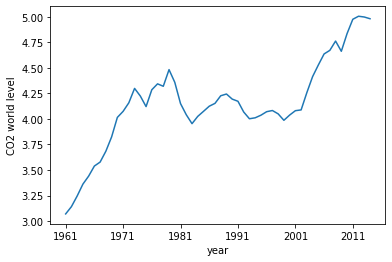

In [85]:
co2[co2["Country Name"] ==  "World"].T.iloc[5:].plot(legend=False)
pl.xlabel("year")
pl.ylabel("CO2 world level");

Figure 1: global levels of CO2 (Kilotons per capita)*italicized text* over time, measured annyally. Data sourced from the World Bank (last accessed Feb15 2020 at https://data.worldbank.org/indicator/EN.ATM.CO2E.LF.KT?end=2014&start=1960&view=chart)

In [0]:
co2 = co2[co2["Country Name"] ==  "World"].T.iloc[5:]

In [87]:
co2.head()

,257
1961,3.07002
1962,3.14096
1963,3.24511
1964,3.36138
1965,3.44005


In [88]:
co2.tail()

,257
2016,NaN
2017,NaN
2018,NaN
2019,NaN
Unnamed: 64,NaN


In [89]:
co2 = co2[:-1]
co2

,257
1961,3.07002
1962,3.14096
1963,3.24511
1964,3.36138
1965,3.44005
1966,3.53875
1967,3.57758
1968,3.6839
1969,3.82378
1970,4.01468


In [0]:
co2.index = pd.to_datetime(co2.index.values, format="%Y")

In [0]:
co2.rename(columns={257:"co2"}, inplace=True)

In [0]:
co2.index = co2.index.map(lambda x: x.year)

In [93]:
print("CO2 dataframe")
co2.head()

CO2 dataframe


,co2
1961,3.07002
1962,3.14096
1963,3.24511
1964,3.36138
1965,3.44005


 standardize the data by subtracting by the mean **over the time period 1960-2003** (which is the period that you will use) and dividing by the stdev over the same period

In [0]:
co2["co2"] = co2.co2.map(lambda x: (x - np.nanmean((co2.loc[
     (co2.index > 1960) & (co2.index <= 2003)]["co2"].values).astype(float))))
co2["co2"] = co2.co2.map(lambda x: (x / np.nanstd((co2.loc[
     (co2.index > 1960) & (co2.index <= 2003)]["co2"].values).astype(float))))


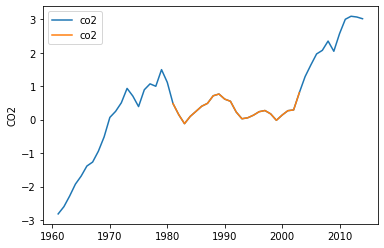

In [95]:
ax = co2.plot()
pl.ylabel("CO2"); 
co2.loc[
     (co2.index > 1980) & (co2.index <= 2003)].plot(ax=ax);

Figure 2: same as figure 1, but in stanrardized units with the relevant portion of the data used for standardizing hightighted in orange. This portion of the data is selected because it is available for all needed datasets: Solar Irradiance, CO2, and global temperature. This will allow us to generate an additive model to predict and interpret temperature data.

acquire the solar irradiance data from http://lasp.colorado.edu/data/sorce/tsi_data/TSI_TIM_Reconstruction.txt.  Explore the data as you did for the CO2 dataset. Modify the dataframe so that it has year as the index (pd.data_frame() type) and "[W/m^2]" is the only column, which you should rename "irradiance". Each year shoud have a single entry, the mean for that year, which you can obtain with the method DataFrame.groupby() and the .mean() method applied to the groupby object as 

```sIr.groupby("Year").mean()```

In [110]:
sIr = pd.read_csv("http://lasp.colorado.edu/data/sorce/tsi_data/TSI_TIM_Reconstruction.txt", skiprows=6, sep=" ")
sIr.columns



Index([';', 'Year', 'Unnamed: 2', 'Unnamed: 3', 'TSI', '[W/m^2]'], dtype='object')

In [111]:
sIr.head()

,;,Year,Unnamed: 2,Unnamed: 3,TSI,[W/m^2]
0,1610.5,NaN,NaN,NaN,NaN,1359.8655
1,1611.5,NaN,NaN,NaN,NaN,1360.2017
2,1612.5,NaN,NaN,NaN,NaN,1360.4352
3,1613.5,NaN,NaN,NaN,NaN,1360.7561
4,1614.5,NaN,NaN,NaN,NaN,1360.9097


In [112]:
sIr.describe()

,;,Year,Unnamed: 2,Unnamed: 3,TSI,[W/m^2]
count,404.000000,0.0,0.0,0.0,0.0,404.000000
mean,1812.000000,NaN,NaN,NaN,NaN,1360.543793
std,116.769003,NaN,NaN,NaN,NaN,0.464534
min,1610.500000,NaN,NaN,NaN,NaN,1359.865500
25%,1711.250000,NaN,NaN,NaN,NaN,1360.191125
50%,1812.000000,NaN,NaN,NaN,NaN,1360.471800
75%,1912.750000,NaN,NaN,NaN,NaN,1360.821275
max,2013.500000,NaN,NaN,NaN,NaN,1362.142500


In [0]:
sIr["Year"] = sIr[";"].astype(int)
sIr = sIr.groupby("Year").mean()[["[W/m^2]"]]

In [0]:
sIr.rename({"[W/m^2]":"irradiance"}, axis=1, inplace=True)

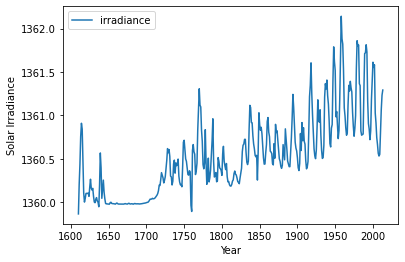

In [115]:
sIr.plot()
pl.ylabel("Solar Irradiance");

Figure 3: global solar irradiance over time , measured annyally n Watts per square meter. Data sourced from the Laboratory form Solar and Atmospheric Physics (Colorado) accesses on   Feb 15th at http://lasp.colorado.edu/data/sorce/tsi_data/TSI_TIM_Reconstruction.txt


Standardize the data by the value **starting in 1960**. (subtract by the mean and divide by the standard deviation)


In [0]:
sIr['irradiance'] -= sIr[sIr.index>1960].irradiance.mean()
sIr['irradiance'] /= sIr[sIr.index>1960].irradiance.std()


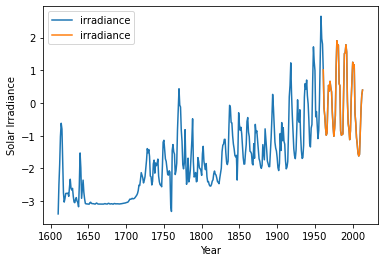

In [117]:
#leave
ax = sIr.plot()
ax = sIr[sIr.index>1960].plot(ax=ax);
pl.ylabel("Solar Irradiance");

Figure 4: Same as figure 3 but the irradiance is standardized and the relevant portion of the data used to standardize is highlighted in orange

acquire the global anomaly (temperature difference) data which I save in the MLTSA_FBianco/HW4 repository as "GLB.Ts%2BdSST.csv"(never say that I am not nice!!)

This required some tricks to set the years as index due to missing values. the soution is in the repository README but I encourage you to figure out how to do it yourself (maybe in a single line of code!)


In [0]:
gt = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/HW4/GLB.Ts%2BdSST.csv", 
                          skiprows=1).set_index("Year").T.iloc[:12]
gt

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Jan,-0.29,-0.16,0.14,-0.32,-0.16,-0.59,-0.42,-0.73,-0.38,-0.11,-0.44,-0.42,-0.28,-0.8,-0.54,-0.44,-0.26,-0.15,-0.03,-0.19,-0.37,-0.24,-0.2,-0.26,-0.68,-0.4,-0.28,-0.42,-0.44,-0.69,-0.45,-0.64,-0.26,-0.42,0.04,-0.17,-0.09,-0.58,-0.42,-0.2,...,0.3,0.55,0.1,0.52,0.3,0.22,0.28,0.36,0.58,0.15,0.41,0.41,0.44,0.37,0.27,0.51,0.25,0.31,0.6,0.48,0.23,0.42,0.75,0.73,0.58,0.72,0.56,0.95,0.23,0.61,0.73,0.48,0.45,0.67,0.73,0.81,1.15,0.98,0.77,0.87
Feb,-0.18,-0.17,0.15,-0.39,-0.08,-0.3,-0.45,-0.52,-0.36,0.19,-0.45,-0.47,-0.12,-0.54,-0.33,-0.42,-0.14,-0.15,-0.3,-0.4,-0.03,-0.04,-0.03,-0.04,-0.58,-0.59,-0.31,-0.51,-0.31,-0.47,-0.44,-0.58,-0.12,-0.43,-0.11,0,-0.13,-0.61,-0.32,-0.23,...,0.42,0.41,0.15,0.41,0.17,-0.06,0.39,0.46,0.43,0.35,0.41,0.49,0.42,0.39,0.02,0.78,0.48,0.38,0.9,0.65,0.56,0.43,0.75,0.55,0.72,0.57,0.69,0.7,0.34,0.51,0.79,0.51,0.48,0.56,0.52,0.87,1.35,1.13,0.85,0.92
Mar,-0.11,0.04,0.03,-0.13,-0.37,-0.25,-0.39,-0.34,-0.41,0.08,-0.4,-0.19,-0.35,-0.23,-0.25,-0.29,-0.26,-0.14,-0.52,-0.34,0.01,0.08,-0.29,-0.24,-0.51,-0.24,-0.16,-0.27,-0.54,-0.51,-0.51,-0.6,-0.35,-0.43,-0.22,-0.1,-0.28,-0.6,-0.25,-0.2,...,0.3,0.49,-0.01,0.43,0.29,0.17,0.27,0.16,0.51,0.36,0.77,0.35,0.48,0.36,0.27,0.45,0.32,0.53,0.63,0.34,0.57,0.55,0.89,0.57,0.64,0.69,0.62,0.69,0.73,0.52,0.91,0.62,0.56,0.65,0.76,0.9,1.31,1.13,0.91,1.11
Apr,-0.2,0.04,-0.19,-0.17,-0.43,-0.42,-0.28,-0.39,-0.22,0.07,-0.37,-0.28,-0.35,-0.3,-0.48,-0.25,-0.31,-0.02,-0.33,-0.21,-0.12,-0.04,-0.3,-0.43,-0.55,-0.36,-0.04,-0.39,-0.46,-0.6,-0.4,-0.54,-0.2,-0.4,-0.29,0.06,-0.3,-0.51,-0.45,-0.14,...,0.33,0.32,0.1,0.31,0.08,0.11,0.24,0.22,0.45,0.33,0.55,0.52,0.24,0.27,0.4,0.47,0.36,0.36,0.63,0.32,0.57,0.5,0.56,0.53,0.62,0.66,0.5,0.73,0.51,0.58,0.85,0.62,0.68,0.53,0.77,0.75,1.07,0.92,0.87,0.97
May,-0.12,0.02,-0.16,-0.2,-0.37,-0.42,-0.26,-0.32,-0.22,-0.02,-0.45,-0.18,-0.25,-0.36,-0.35,-0.27,-0.18,-0.05,-0.32,-0.23,-0.1,-0.17,-0.35,-0.44,-0.56,-0.33,-0.24,-0.47,-0.41,-0.56,-0.35,-0.52,-0.22,-0.47,-0.23,-0.07,-0.32,-0.55,-0.46,-0.28,...,0.36,0.24,0.15,0.36,0.33,0.17,0.24,0.25,0.43,0.16,0.46,0.38,0.32,0.27,0.28,0.26,0.27,0.36,0.69,0.31,0.36,0.56,0.63,0.6,0.38,0.62,0.46,0.66,0.47,0.64,0.73,0.51,0.75,0.58,0.85,0.75,0.91,0.89,0.81,0.85
Jun,-0.23,-0.2,-0.26,-0.13,-0.41,-0.44,-0.39,-0.24,-0.18,-0.14,-0.27,-0.2,-0.23,-0.29,-0.44,-0.24,-0.14,-0.16,-0.21,-0.33,-0.13,-0.13,-0.35,-0.46,-0.51,-0.31,-0.21,-0.44,-0.41,-0.53,-0.38,-0.48,-0.26,-0.49,-0.26,-0.21,-0.47,-0.43,-0.36,-0.38,...,0.17,0.32,0.05,0.2,0.05,0.18,0.11,0.37,0.43,0.14,0.38,0.53,0.25,0.25,0.42,0.41,0.25,0.53,0.77,0.37,0.41,0.54,0.55,0.47,0.42,0.66,0.64,0.59,0.46,0.65,0.62,0.57,0.63,0.66,0.66,0.79,0.77,0.7,0.74,0.86
Jul,-0.21,-0.07,-0.21,-0.08,-0.35,-0.36,-0.22,-0.23,-0.09,-0.1,-0.27,-0.2,-0.32,-0.16,-0.26,-0.18,-0.04,-0.07,-0.24,-0.18,-0.13,-0.16,-0.3,-0.37,-0.54,-0.29,-0.25,-0.37,-0.4,-0.45,-0.35,-0.41,-0.44,-0.37,-0.24,-0.11,-0.36,-0.25,-0.31,-0.29,...,0.28,0.34,0.13,0.18,0.17,-0.01,0.11,0.45,0.34,0.34,0.43,0.48,0.12,0.28,0.3,0.48,0.35,0.35,0.68,0.37,0.38,0.6,0.61,0.53,0.24,0.63,0.52,0.6,0.59,0.69,0.59,0.71,0.53,0.57,0.56,0.71,0.82,0.82,0.78,0.9
Aug,-.09,-.03,-.06,-.15,-.26,-.32,-.34,-.32,-.16,-.20,-.38,-.16,-.25,-.27,-.22,-.16,-.04,-.11,-.25,-.07,-.10,-.20,-.32,-.49,-.50,-.22,-.20,-.35,-.46,-.31,-.37,-.42,-.55,-.34,-.14,-.20,-.26,-.22,-.30,-.33,...,.23,.32,.07,.33,.16,.15,.12,.28,.47,.37,.31,.40,.07,.13,.21,.46,.49,.41,.66,.31,.42,.48,.53,.65,.43,.60,.70,.57,.44,.66,.63,.71,.62,.66,.81,.79,1.00,.87,.73,***
Sep,-.16,-.14,-.10,-.21,-.27,-.24,-.26,-.23,-.10,-.22,-.39,-.14,-.13,-.20,-.25,-.09,-.03,-.08,-.22,-.03,-.05,-.22,-.29,-.49,-.53,-.19,-.27,-.33,-.3

In [0]:
gt = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/HW4/GLB.Ts%2BdSST.csv", 
                          skiprows=1).set_index("Year").T.iloc[:12].replace('***', 
                                                np.nan).astype(float).mean()

gt = pd.DataFrame(gt)

In [119]:
gt.set_index(pd.to_datetime(gt.index, format="%Y").year, inplace=True)
gt.rename({0:"Anomaly"}, axis=1, inplace=True)
gt

,Anomaly
Year,
1880,-0.187500
1881,-0.100833
1882,-0.110000
1883,-0.191667
1884,-0.294167
...,...
2015,0.865833
2016,0.991667
2017,0.902500


In [120]:
#leave
gt.head()

,Anomaly
Year,
1880,-0.187500
1881,-0.100833
1882,-0.110000
1883,-0.191667
1884,-0.294167


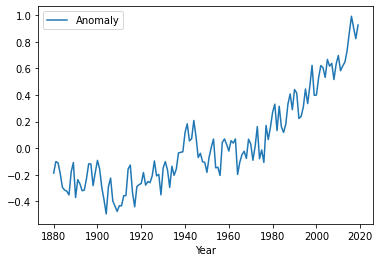

In [121]:
#leave
gt.plot();

Figure 5: global temperature anomaly from the NASA GISS survey. The data was accessed at https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/HW4/GLB.Ts%2BdSST.csv", on Feb 15 2020. The data represents the deviation in degree Kelvin from the mean global temperature and it is measured monthly, then averaged to annual time scales.
              

Standardize the anomaly data between 1960 and 2003

In [122]:
gt['Anomaly'] =  gt.Anomaly.map(lambda x: x - np.nanmean(gt.loc[
     (gt.index > 1960) & (gt.index <= 2003)]["Anomaly"]))
gt['Anomaly'] =  gt.Anomaly.map(lambda x: x / np.nanstd(gt.loc[
     (gt.index > 1960) & (gt.index <= 2003)]["Anomaly"]))
gt['Anomaly'].mean()

-0.7605664905185636

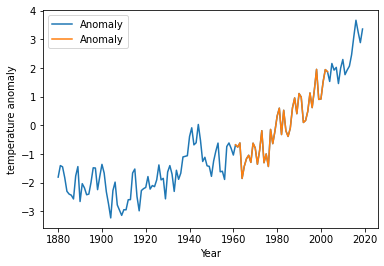

In [124]:
ax = gt.plot()
gt[(gt.index > 1960) & (gt.index <= 2003)].plot(ax=ax)
pl.ylabel("temperature anomaly");

Figure 6: As figure 5 but standardized using the portion of the data highlighted in orange

Merge all dataframes using the index for all of them as merging column, You can do this in a single command concatenating merge() methods (like in the first homework).

In [0]:
climate = pd.merge(gt, co2, left_index=True, right_index=True).merge(
    sIr, left_index=True, right_index=True)

In [127]:
climate.describe()

,Anomaly,co2,irradiance
count,53.000000,53.000000,5.300000e+01
mean,0.360965,0.435486,-1.150432e-12
std,1.187409,1.313407,1.000000e+00
min,-1.850355,-2.817157,-1.622573e+00
25%,-0.637328,0.067079,-8.563154e-01
50%,0.405720,0.390812,-1.529831e-01
75%,1.456494,0.997972,6.613319e-01
max,2.294795,3.090899,1.904178e+00


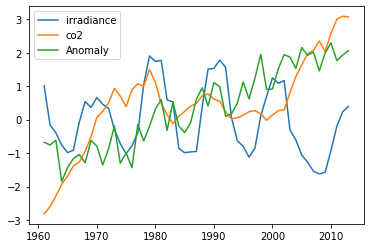

In [126]:
climate[["irradiance", "co2", "Anomaly"]].plot()

Figure 7: same as data in Figure 2,4,6 but plotted at once. This highlights the common trends (between CO2 and Anomaly, and the presence of seasonality (in the irradiance data on a ~10 year cycle, shorter time scaled in the Anomaly data)

# modeling
 import pydlm to create models of the global temperature anomaly.

 ## Model 1: 
 Create a model that has 
 - 1 a linera trend of degree 2 
 - a seasonality with 11 years period which correspond to the 11-years solar cycles https://en.wikipedia.org/wiki/Solar_cycle
 

 ## Model 2: 
 Create a model that has 
 - 1 a linera trend of degree 2 
 - a seasonality with 11 years period 
 - a regression on CO2, 
 
 
 ## Model 3
remove the regressor on the solar irradiance and see if the model is as good (i.e. does the 11 years cyle takes care of solar irradiance?) (e.g. you can check the MSE as ```model.getMSE()```


You can follow the examples here 
https://pydlm.github.io/example1.html#dynamic-linear-regression


## generate the models

In [0]:
# model 1
# A linear trend
linear_trend = trend(degree=2, discount=0.95, name='trend', w=4)
# A seasonality
seasonal11 = seasonality(period=11, discount=0.9, name='seasonal11', w=4)


In [0]:

# generating an exogenous variable from the data: CO2
regressor4 = dynamic(features=climate.iloc[:,1:2].values, 
                      name='regressor4', w=4)
# generating an exogenous variable from the data: Irradiance
regressor5 = dynamic(features=climate.iloc[:,2:3].values, 
                      name='regressor5', w=4)


In [0]:
# Build a simple dlm
simple_dlm = dlm(climate.Anomaly) + linear_trend + seasonal11

# model with linear, seasonal components, and regression on CO2
regressed_dlm_noir = dlm(climate.Anomaly) + linear_trend + \
          seasonal11 + regressor4 

# model with linear, seasonal components, and regression on CO2 and on irradiance
regressed_dlm = dlm(climate.Anomaly) + linear_trend + \
          seasonal11 + regressor4 + regressor5


## run the models

In [150]:
# Fit  model 1
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


In [151]:
# Fit  model 2
regressed_dlm.fit()
# Plot the fitted results
regressed_dlm.turnOff('data points')

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


In [152]:
# Fit  model 3
regressed_dlm_noir.fit()
# Plot the fitted results
regressed_dlm_noir.turnOff('data points')

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


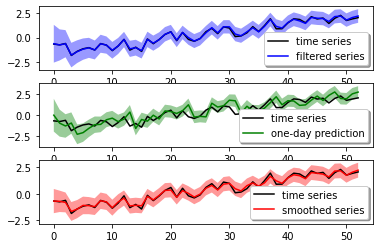

In [153]:
simple_dlm.plot()

Figure 8: the compoonent of a simple additive model including a linear and a seasonal trend for global temperature anomaly, generated with the package pydlm which implements a Bayesian dynamic linear regression: the time series prediction on the original and smoothed time series are shown. The three subplots indicate: the original and de-noised time series (blue), the prediction at a 1-year horizon (labeled as one-day as the package assumes time units are days, but in our case they are years), and the smoothed time series (red).

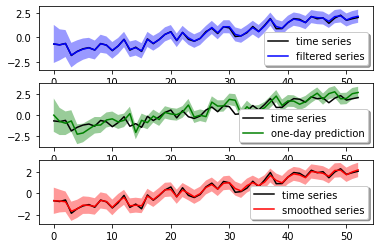

In [154]:
regressed_dlm_noir.plot()

Figure 9: the regression results based on model with linear plus seasonal components and regression on CO2. Colors as figure 8.

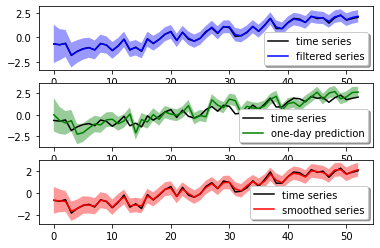

In [155]:
regressed_dlm.plot()

Figure 10: the regression results based on model with linear plus seasonal components and regression on CO2 and irradiance. This model captures both long term variance and variations on short time scales. Colors as figure 8.

In [157]:
print("""MSE model fit: 
simple {:.3f},
seasonality and CO2 regression {:.3f},
seasonality and CO2 + solar irradiance regression {:.3f}
""".format( 
simple_dlm.getMSE(), 
regressed_dlm_noir.getMSE(),
regressed_dlm.getMSE()))

MSE model fit: 
simple 0.435,
seasonality and CO2 regression 0.446,
seasonality and CO2 + solar irradiance regression 0.451



Comments: the models provided a modest fit to the data, explaining just under 50% of the variance. With the addition of regressors the models improve but only very slightly. A test suc as AIC or likelihood ratio should be performed to assess if the added complexity is justifies by the data.

# Visualize the components of the most complex model

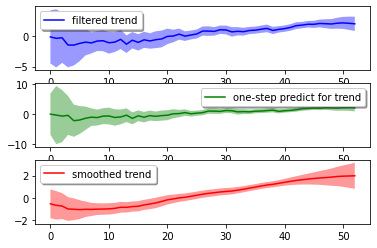

In [162]:
regressed_dlm.plot('trend')

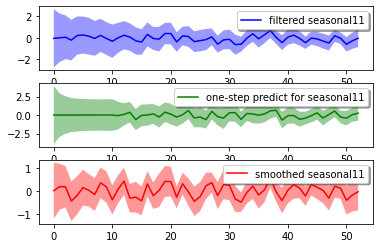

In [163]:
regressed_dlm.plot('seasonal11')

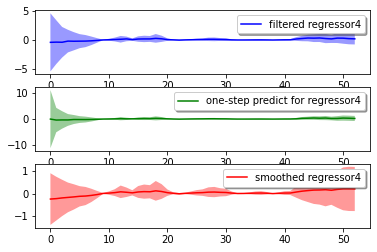

In [164]:
regressed_dlm.plot('regressor4')

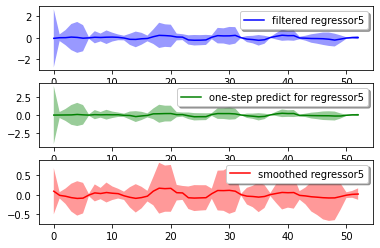

In [165]:
regressed_dlm.plot('regressor5')

Figure 11: the 4 plots above show the components of the most complex lnear model. Colors as figure 8.

# Optional: 
for one or more of your models plot the residuals and discuss them following the examples here 
https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/SARIMAXDiagnostics_financialTS.ipynb


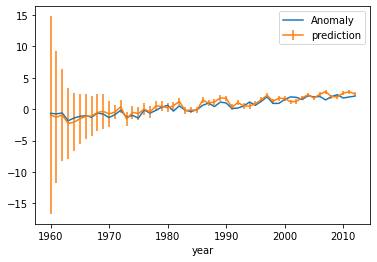

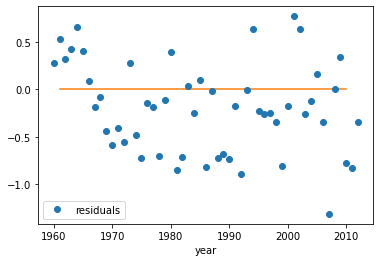

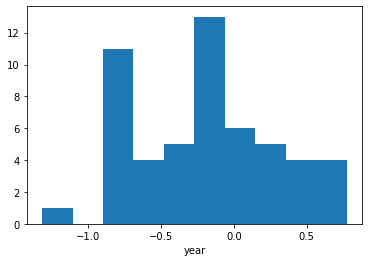

In [202]:
pred = [np.array(simple_dlm.predict(i))[0][0][0] for i in range(len(climate.Anomaly))]
err = [np.array(simple_dlm.predict(i))[1][0][0] for i in range(len(climate.Anomaly))]
pl.plot(1960 + np.arange(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
pl.errorbar(1960 + np.arange(len(climate.Anomaly)), pred, yerr=err, label="prediction")

resids_simple = (climate.Anomaly.values - pred)
pl.legend()
pl.xlabel("year")

pl.figure()
pl.errorbar(1960 + np.arange(len(climate.Anomaly)), resids_simple,  
            fmt='o', label="residuals")
pl.legend()
pl.plot([1961, 2010], [0, 0])
pl.xlabel("year")

pl.figure()
pl.hist(resids_simple);
pl.xlabel("year");



Figure 12: Anomaly, prediction, and their residuals from the simple model (no regressors). Top: The data and prediction. Note how uncertanty in the prediction decreases as the model has more past points to predict the future. Middle: the resduals between data and predictions are plotted. An orange line indicates residuals=0 (perfect prediction). The range of the residuals is contained between -1.5 and 1 (standardized units). Bottom: histogram of the resituals: there are isolated negative residuals larger (in absolute value) than -1.

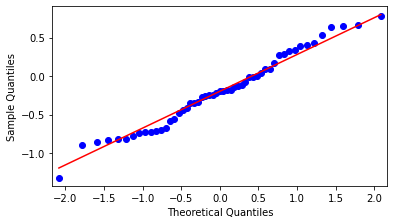

In [204]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
ax = pl.figure().add_subplot(111)
ax.set_aspect('equal')
qqplot(resids_simple, line='s', ax=ax)
pyplot.show()

Figure 13: "quartile plot" of the resuduals to the simple additive model (no regressors). The red line indicates Gaussian residuals. The residuals deviate slightly from gaussian, but are not obviously skewed either above or below the line overall

No handles with labels found to put in legend.


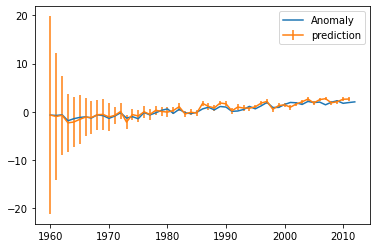

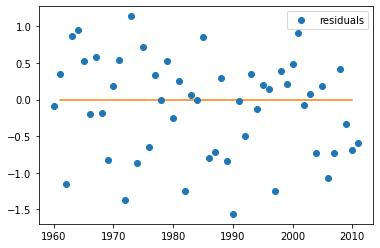

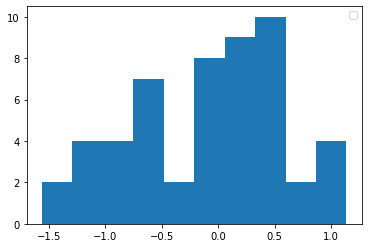

In [205]:
pred = [np.array(regressed_dlm.predict(i))[0][0][0] for i in range(len(climate.Anomaly)-1)]
err = [np.array(regressed_dlm.predict(i))[1][0][0] for i in range(len(climate.Anomaly)-1)]
pl.plot(1960 + np.arange(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
pl.errorbar(1960 + np.arange(len(climate.Anomaly)-1), pred, yerr=err, label="prediction")
pl.legend()

pl.figure()

resids_complex = (climate.Anomaly.values[1:] - pred)
pl.errorbar(1960 + np.arange(len(climate.Anomaly)-1), resids_complex, fmt='o',
 label="residuals")
pl.legend()
pl.plot([1961, 2010], [0, 0])

pl.figure()
pl.legend()
pl.hist(resids_complex);


Figure 14: same as figure 12 for the most complex model including both regression on CO2 and on Irradiance. The residuals extend farther both above and below 0 

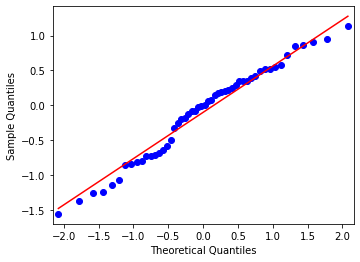

In [207]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
ax = pl.figure().add_subplot(111)
ax.set_aspect('equal')
qqplot(resids_complex, line='s', ax=ax)
pyplot.show()

Figure 15: same as figure 13, for the complex model described in Figures 10, and 11.

In [208]:
from scipy.stats import shapiro
seed(1)
# generate univariate observations
# normality test
print("SIMPLE MODEL")
stat, p = shapiro(resids_simple)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


print("\n\n\nCOMPLEX MODEL")
stat, p = shapiro(resids_complex)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

SIMPLE MODEL
Statistics=0.977, p=0.391
Sample looks Gaussian (fail to reject H0)



COMPLEX MODEL
Statistics=0.970, p=0.206
Sample looks Gaussian (fail to reject H0)


In both cases, the residuals are statistically consistent with a Gaussian (unbiased) distribution indicating, in absence of better regressors, there is no evidence that the models fail to capture all the non-stokastic variance